<a href="https://colab.research.google.com/github/Peeyush2027/Telecom-churn-analysis/blob/main/CH_Peeyush_Jain_Telecom_Churn_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Orange S.A., formerly France Télécom S.A., is a French multinational telecommunications corporation. The Orange Telecom's Churn Dataset, consists of cleaned customer activity data (features), along with a churn label specifying whether a customer canceled the subscription.

## <b> Explore and analyze the data to discover key factors responsible for customer churn and come up with ways/recommendations to ensure customer retention. </b>

In [ ]:
#Import package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path='/content/drive/MyDrive/Almabetter assignments/Module 1- Python/Capstone Project/Capstone project-1 ( Telecom )/Copy of Telecom Churn.csv'
df=pd.read_csv(file_path)

In [10]:
df.head(15)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
5,AL,118,510,Yes,No,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False
6,MA,121,510,No,Yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False
7,MO,147,415,Yes,No,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False
8,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
9,WV,141,415,Yes,Yes,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False


In [18]:
# df[df['Account length']<80 and df['Voice mail plan']=='Yes'][['Account length','Voice mail plan']]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

**1. Statewise churning**

In [ ]:


state_df = pd.DataFrame(df[df['Churn']==True]['State'].value_counts())
# df1=df.groupby('State')[df['Churn']==True].count()
state_df.head()

,State
NJ,18
TX,18
MD,17
MI,16
NY,15


Text(0.5, 0, 'Churn-True')

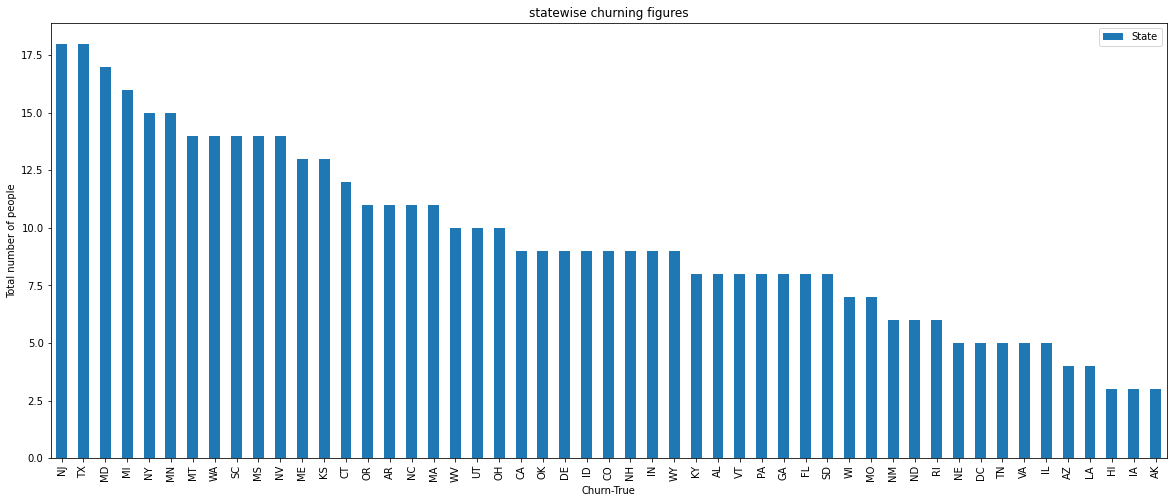

In [ ]:
plt.rcParams['figure.figsize'] = (20, 8)
state_df.plot(kind='bar')

plt.title('statewise churning figures')
plt.ylabel('Total number of people')
plt.xlabel('Churn-True')

**2. Statewise distribution of customer service calls**

In [ ]:
# State wise distribution of customer service calls for true & false churn
df2= pd.DataFrame(df.groupby(['Churn','State'])['Customer service calls'].sum())

df2 = pd.DataFrame(df2.unstack())
df2

Customer service calls                       ...                           
State                     AK   AL  AR  AZ  CA  CO  ...   VA   VT  WA  WI   WV  WY
Churn                                              ...                           
False                     71  101  67  93  34  95  ...  115  104  72  98  131  94
True                      10   24  42   9  16  23  ...    8   23  29  13   28  17

[2 rows x 51 columns]

Text(0.5, 0, 'Churn-True')

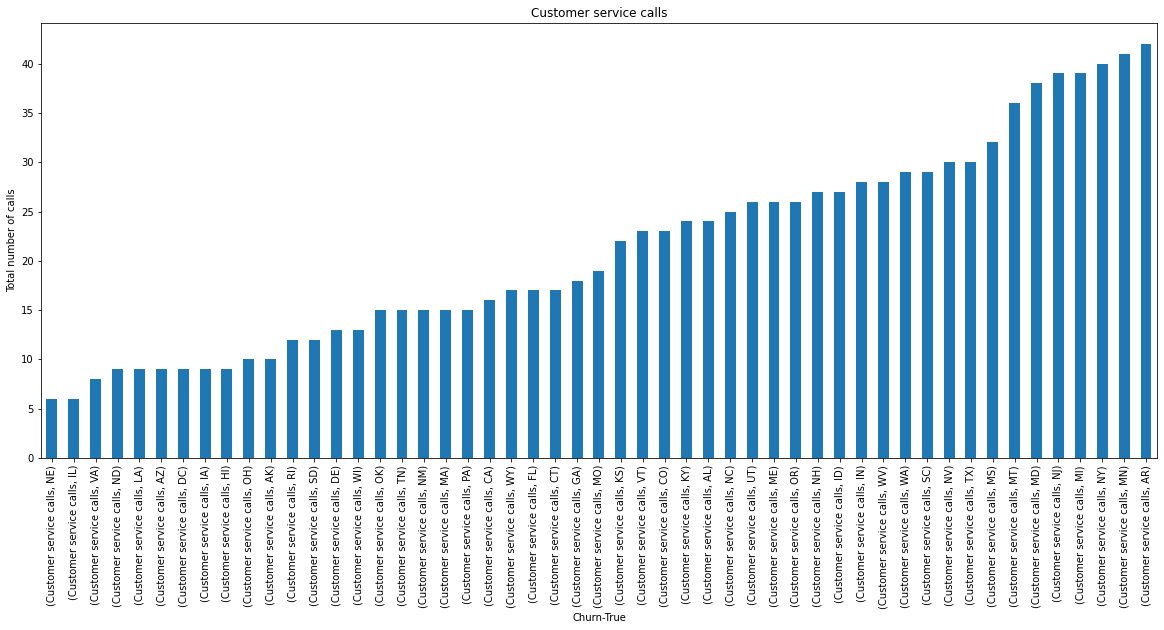

In [ ]:
state_true= df2.loc[True].sort_values()
plt.rcParams['figure.figsize'] = (20, 8)
state_true.plot(kind='bar')

plt.title('Customer service calls')
plt.ylabel('Total number of calls')
plt.xlabel('Churn-True')

**3. Churning rate**

In [ ]:
# Total customer service calls as per the churning and churning rate:

df3 = pd.DataFrame(df.groupby('Churn').agg({'Customer service calls':'sum','Churn':'count'}))

churning_rate = (df[df['Churn']==True]['Churn'].count()/df['Churn'].count())*100
print('The rate of churning is',round(churning_rate,2),'%')
df3

The rate of churning is 14.49 %


,Customer service calls,Churn
Churn,,
False,4132,2850
True,1077,483


Text(0.5, 0, 'Churn')

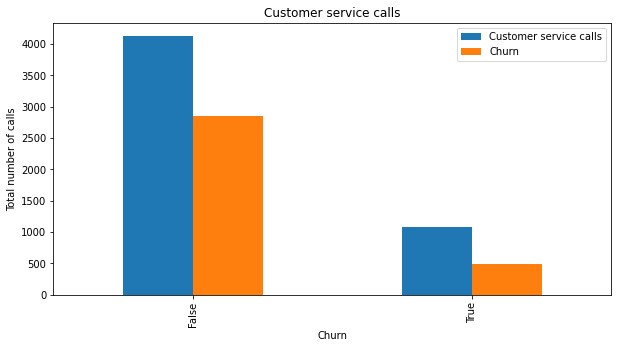

In [ ]:
plt.rcParams['figure.figsize'] = (10, 5)
df3.plot(kind='bar')

plt.title('Customer service calls')
plt.ylabel('Total number of calls')
plt.xlabel('Churn')

In [ ]:
# Avg. service calls for true and false churning:

avg_false_sc = df3.loc[False,'Customer service calls']/df3.loc[False,'Churn']

print('avg. service calls for False churn', avg_false_sc)

avg_true_sc = df3.loc[True,'Customer service calls']/df3.loc[True,'Churn']
print('avg. service calls for True churn', avg_true_sc)

percent_diff = ((avg_true_sc-avg_false_sc)/avg_false_sc)*100
print(f'avg service calls in True churning is {round(percent_diff)}% more than false churning')

avg. service calls for False churn 1.4498245614035088
avg. service calls for True churn 2.229813664596273
avg service calls in True churning is 54% more than false churning


**4. call charges for day/night and eve**

In [8]:
# Avg call charge in during night calls and day: 

avg_chrge_night_true = df[df['Churn']==True]['Total night charge'].sum()/df[df['Churn']==True]['Total night minutes'].sum()
print('night true',avg_chrge_night_true)
avg_chrge_night_false = df[df['Churn']==False]['Total night charge'].sum()/df[df['Churn']==False]['Total night minutes'].sum()
print('night false',avg_chrge_night_false)

avg_chrge_day_true = df[df['Churn']==True]['Total day charge'].sum()/df[df['Churn']==True]['Total day minutes'].sum()
print('day true',avg_chrge_day_true)
avg_chrge_day_false = df[df['Churn']==False]['Total day charge'].sum()/df[df['Churn']==False]['Total day minutes'].sum()
print('day false',avg_chrge_day_false)


avg_chrge_eve_true = df[df['Churn']==True]['Total eve charge'].sum()/df[df['Churn']==True]['Total eve minutes'].sum()
print('eve true',avg_chrge_eve_true)
avg_chrge_eve_false = df[df['Churn']==False]['Total eve charge'].sum()/df[df['Churn']==False]['Total eve minutes'].sum()
print('eve false',avg_chrge_eve_false)

avg_chrge_intl_true = df[df['Churn']==True]['Total intl charge'].sum()/df[df['Churn']==True]['Total intl minutes'].sum()
print('intl true',avg_chrge_intl_true)
avg_chrge_intl_false = df[df['Churn']==False]['Total intl charge'].sum()/df[df['Churn']==False]['Total intl minutes'].sum()
print('intl false',avg_chrge_intl_false)

night true 0.04500049935991139
night false 0.04500039973379132
day true 0.17000255154368393
day false 0.17000309864238602
eve true 0.08500050197818391
eve false 0.08500114759479294
intl true 0.27005088910818287
intl false 0.2700498742781355


**5. Voice mail plan vs churn :**

In [ ]:
df4 = df.groupby(['Churn', 'Voice mail plan'])['Voice mail plan'].count()
print(df4.unstack())
vmp_yes_true = (df4.unstack().loc[True,'Yes'] / df4.unstack().loc[True].sum())*100
print('The % of people with TRUE churning with voice plan activated', round(vmp_yes_true,2),'%')
vmp_yes_false = (df4.unstack().loc[False,'Yes'] / df4.unstack().loc[False].sum())*100
print('The % of people with FALSE churning with voice plan activated',round(vmp_yes_false,2),'%')

Voice mail plan    No  Yes
Churn                     
False            2008  842
True              403   80
The % of people with TRUE churning with voice plan activated 16.56 %
The % of people with FALSE churning with voice plan activated 29.54 %


Text(0, 0.5, 'voice mail plan no')

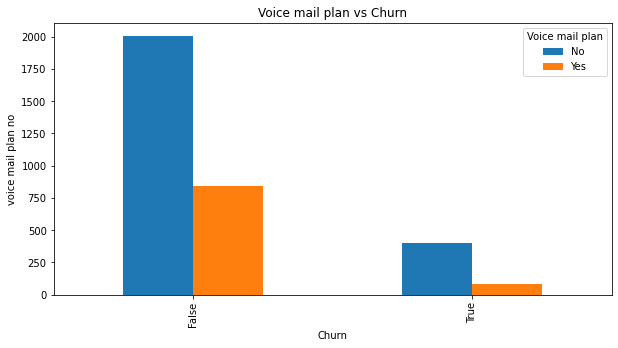

In [ ]:
plt.rcParams['figure.figsize'] = (10, 5)
df4.unstack().plot(kind='bar')
plt.title('Voice mail plan vs Churn')
plt.xlabel('Churn')
plt.ylabel('voice mail plan no')

**6. Vmail msg vs churn**

In [ ]:
# avg no of Vmail msgs in True anf false churn:
df5 = df.groupby(['Churn'])['Number vmail messages'].mean()
df5

Churn
False    8.604561
True     5.115942
Name: Number vmail messages, dtype: float64

Text(0, 0.5, 'Number vmail message')

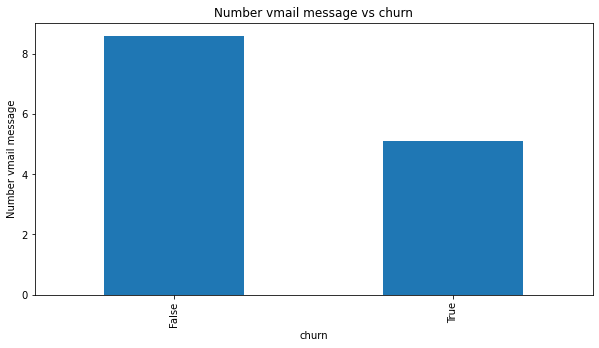

In [ ]:
plt.rcParams['figure.figsize'] = (10, 5)
df5.plot(kind='bar')
plt.title('Number vmail message vs churn')
plt.xlabel('churn')
plt.ylabel('Number vmail message')

**7. International plan vs churning**

In [ ]:
df6 = df.groupby(['Churn','International plan'])['International plan'].count()
df6.unstack()

# people having intl plan with false churning:

percent_false_intl = (df6.loc[False,'Yes']/df6.loc[False].sum())*100
print('The % of customers with false churning having intl plan is', round(percent_false_intl,2),'%')

# people having intl plan with true churning:

percent_true_intl  = (df6.loc[True,'Yes']/df6.loc[True].sum())*100
print('The % of customers with true churning having intl plan is',round(percent_true_intl,2),'%')


The % of customers with false churning having intl plan is 6.53 %
The % of customers with true churning having intl plan is 28.36 %


Text(0, 0.5, 'International plan')

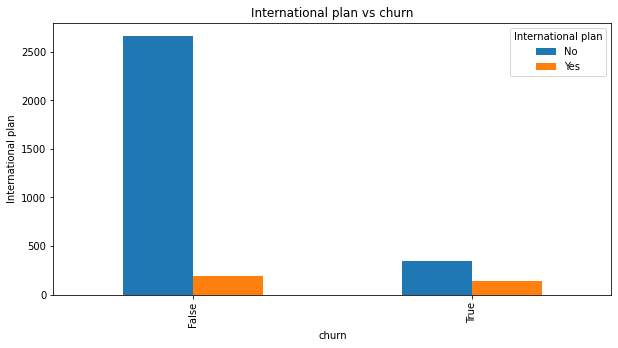

In [ ]:
plt.rcParams['figure.figsize'] = (10, 5)
df6.unstack().plot(kind='bar')
plt.title('International plan vs churn')
plt.xlabel('churn')
plt.ylabel('International plan')

**8. Total day/night/eve/intl mins with respect to churn**

In [31]:
# new_df = df.groupby(['Churn']).agg({'Total day minutes':'sum','Total eve minutes':'sum','Total night minutes':'sum','Total intl minutes':'sum'})
# new_df = df.groupby(['Churn']).agg({'Total day minutes':'mean','Total eve minutes':'mean','Total night minutes':'mean','Total intl minutes':'mean'})
new_df = df.groupby(['Churn']).agg({'Total day minutes':'median','Total eve minutes':'median','Total night minutes':'median','Total intl minutes':'median'})

new_df

,Total day minutes,Total eve minutes,Total night minutes,Total intl minutes
Churn,,,,
False,177.2,199.6,200.25,10.2
True,217.6,211.3,204.80,10.6


Text(0.5, 0, 'Churn-True')

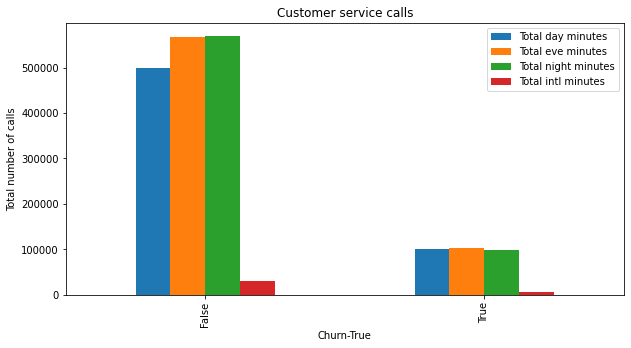

In [30]:
plt.rcParams['figure.figsize'] = (10, 5)
new_df.plot(kind='bar')
plt.title('Customer service calls')
plt.ylabel('Total number of calls')
plt.xlabel('Churn-True')


In [51]:
df8 = df[(df['Churn']==True) & (df['Customer service calls'] > 3)]
# df8[df8['Total night minutes']>204].value_counts()

In [52]:
df8.head()


,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
10,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
15,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
21,CO,77,408,No,No,0,62.4,89,10.61,169.9,121,14.44,209.6,64,9.43,5.7,6,1.54,5,True
48,ID,119,415,No,No,0,159.1,114,27.05,231.3,117,19.66,143.2,91,6.44,8.8,3,2.38,5,True
54,WY,87,415,No,No,0,151.0,83,25.67,219.7,116,18.67,203.9,127,9.18,9.7,3,2.62,5,True


In [44]:
# df9 = df8.groupby(['Voice mail plan','State'])['Customer service calls'].count()
# df9

Voice mail plan  State
No               AK        3
                 AL        7
                 AR       10
                 AZ        4
                 CA        7
                          ..
Yes              VT        1
                 WA        1
                 WI        1
                 WV        2
                 WY        1
Name: Customer service calls, Length: 93, dtype: int64

Text(0.5, 0, 'Churn-True')

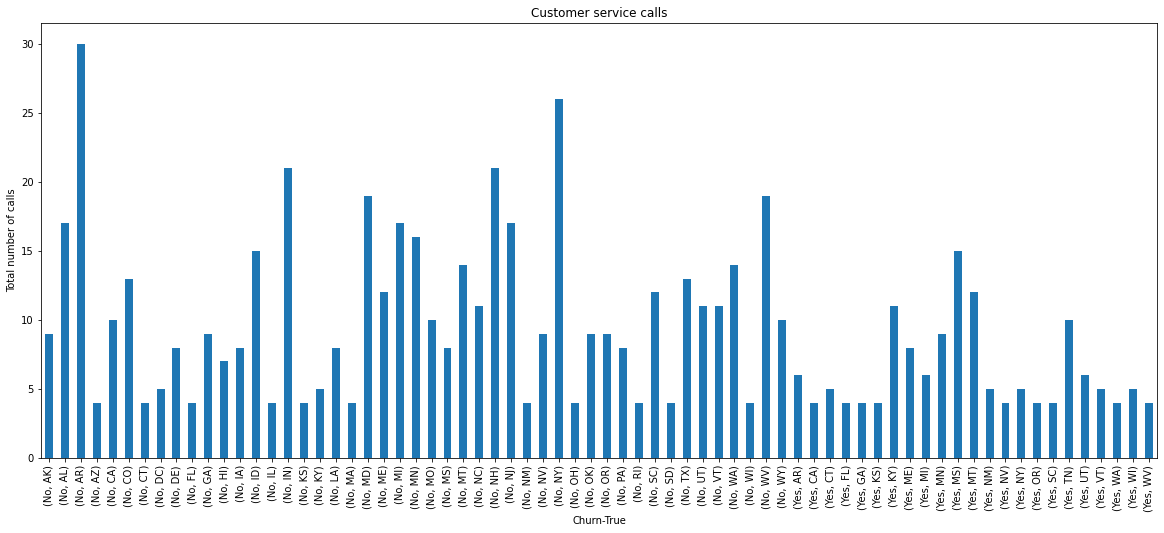

In [66]:
df9=df8.groupby(['Voice mail plan','State'])['Customer service calls'].sum()
df9
plt.rcParams['figure.figsize'] = (20, 8)
ax = df9.plot.bar(stacked=True)
ax
plt.title('Customer service calls')
plt.ylabel('Total number of calls')
plt.xlabel('Churn-True')

1. Statewise churning counts - done
2. Statewise cutome service calls - 
3. Intl plan vs churning - done
4. voice mail plan vs churning - done
5. customer service calls vs churning - ( Rate of Churning ) - done
6. reasons of churning in top 10 states - 
7. call charges for day/ night/ eve - 
8. avg call charges/mins - 
9. 